In [1]:
%matplotlib inline

import math
import numpy as np
import numpy.linalg as la
from importlib import reload
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import beta, norm, gamma, kstest, alpha, t, recipinvgauss, ncf, ksone, johnsonsu, maxwell
import pandas as pd
a4_dims = (11.7, 8.27)

In [2]:
x = np.array([1,0,0])
la.norm(x)

1.0

In [176]:
import src.analysis.utils as ana_utils
reload(ana_utils)

<module 'src.analysis.utils' from '/home/garro/Projects/masterarbeit/src/analysis/utils.py'>

,hamming_dist,stdev,avg
0,0,0.000000,0.000000
1,1,0.734918,1.158595
2,2,0.404313,2.221661
3,3,0.286644,2.694041
4,4,0.191345,3.109263
5,5,0.134354,3.410391
6,6,0.073040,3.630979
7,7,0.049304,3.798729
8,8,0.022344,3.972676
9,9,0.035205,4.112848


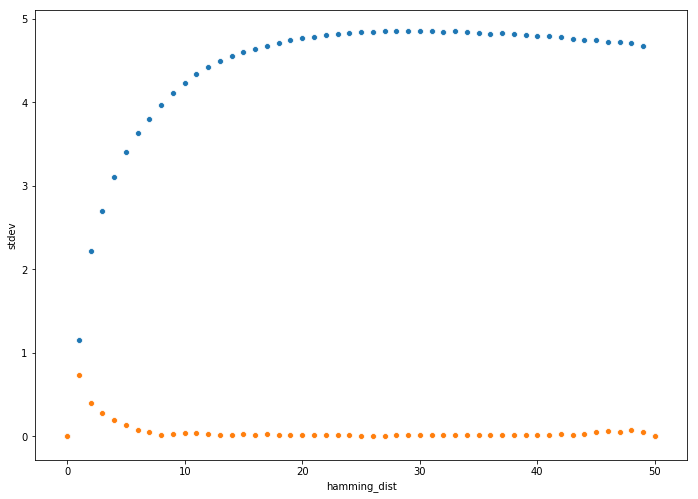

In [182]:
data = ana_utils.hamming_dist_to_state_entropy_avg_and_stdev(
    'exp2.db',
    1
)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='hamming_dist', y='avg', data=data, ax=ax)
sns.scatterplot(x='hamming_dist', y='stdev', data=data, ax=ax)
data

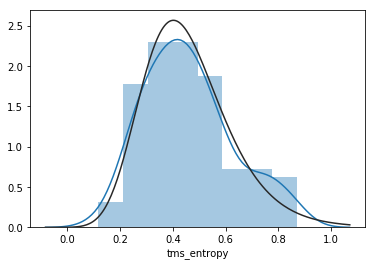

In [101]:
data=ana_utils.tms_entropy('experiments.db', satisfies=lambda _, h, c: c and h>0.1)
sns.distplot(data['tms_entropy'], fit=alpha)

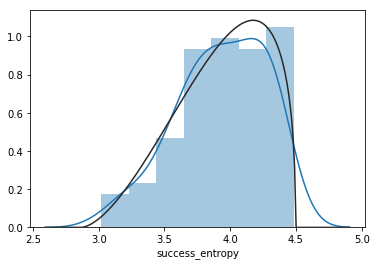

In [53]:
reload(ana_utils)
data = ana_utils.latest_entropy('experiments.db', 'single_entropy')
sns.distplot(data['success_entropy'], fit=beta)

(109.32864979766383, 289.84994682814016)

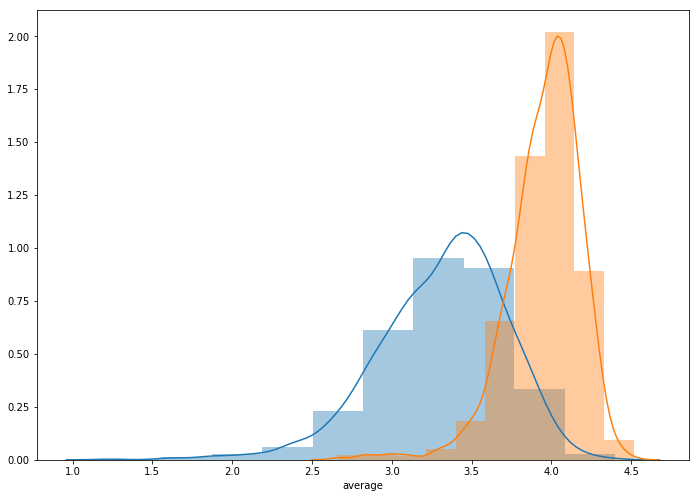

In [128]:
reload(ana_utils)
data = ana_utils.avg_entropy(
    'experiments.db',
    #'single_entropy',
    'mutual_information',
    #satisfies=lambda f_id, run, search, sat, l, mi, ma, h: sat==0
)
data2 = ana_utils.avg_entropy(
    'experiments.db',
    'single_entropy',
    #'mutual_information',
    #satisfies=lambda f_id, run, search, sat, l, mi, ma, h: sat==0
)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(data['average'], bins=10, ax=ax)
sns.distplot(data2['average'], bins=10, ax=ax)
norm.fit(data)

91


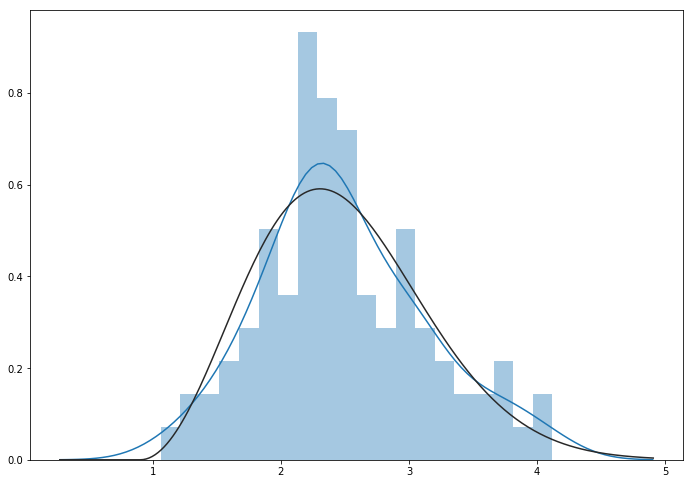

In [8]:
xs = ana_utils.get_entropy_avg(
    '/media/sf_VBoxshare/Experimente/output/dynamic_2/gsat_296_320.db',
    3,
    'mutual_information'
)
print(len(xs))
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(xs, ax=ax, fit=maxwell, bins=20)

In [9]:
dist = maxwell

rejected, total = 0, 0
for i in range(1,11):
    xs = ana_utils.get_entropy_avg(
        '/media/sf_VBoxshare/Experimente/output/dynamic_2/gsat_296_320.db',
        i,
        'mutual_information'
    )
    theta = dist.fit(xs)
    d, p = kstest(xs, lambda x: dist.cdf(x, *theta))
    total += 1
    if d >= 1.358/math.sqrt(len(xs)):
        rejected += 1
        
    print(f'd={d} p={p} reject={1.358/math.sqrt(len(xs))}')
        
print(f'{i}: {rejected}/{total}')  

d=0.9988073826049623 p=0.0 reject=0.14006700524194415
d=0.9894196815767801 p=0.0 reject=0.14314576875028864
d=0.9989009306647704 p=0.0 reject=0.1423570808268365
d=0.9965482604251971 p=0.0 reject=0.1439477121048637
d=0.9931973852428255 p=0.0 reject=0.1415812871447538
d=0.9975713744935409 p=0.0 reject=0.14006700524194415
d=0.9925972215036111 p=0.0 reject=0.1415812871447538
d=0.9942109544476697 p=0.0 reject=0.14314576875028864
d=0.9923812850620067 p=0.0 reject=0.14006700524194415
d=0.9914864418576362 p=0.0 reject=0.1415812871447538
10: 10/10


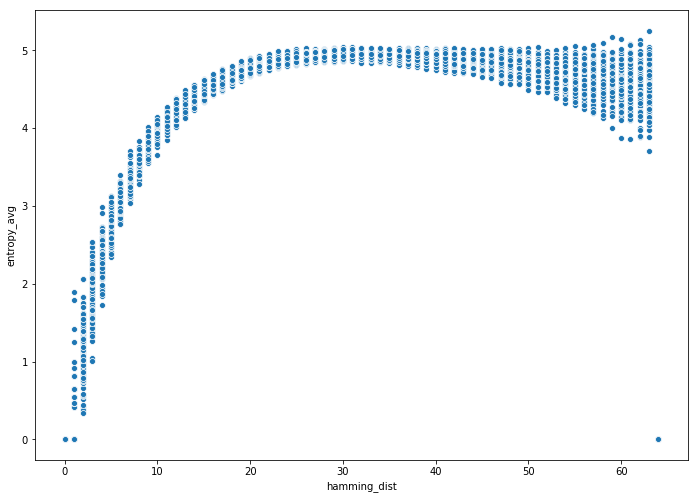

In [133]:
xs = ana_utils.get_state_entropy_points('/media/sf_VBoxshare/Experimente/output/static_2/walksat.db',1)
df = pd.DataFrame.from_dict(xs)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='hamming_dist', y='entropy_avg', data=df, ax=ax)

In [11]:
for i in range(1,11):
    s_entropy_distr = ana_utils.get_state_entropy_distr('/media/sf_VBoxshare/Experimente/output/static_2/walksat.db',i)
    rejected, total = 0, 0
    for hamming_dist, data in s_entropy_distr.items():
        theta = norm.fit(data)
        d, p = kstest(data, lambda x: norm.cdf(x, *theta))
        total += 1
        if d >= 1.358/math.sqrt(100):
            rejected += 1
        
    # print(f'd={d} p={p} reject={d >= 1.358/math.sqrt(100)}')
        
    print(f'{i}: {rejected}/{total}')

/usr/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, 

1: 1/65
2: 1/65
3: 1/65
4: 1/65
5: 1/65
6: 1/65
7: 1/65
8: 1/65
9: 1/65
10: 1/65


In [12]:
xs = ana_utils.read_improvement_probs('/media/sf_VBoxshare/Experimente/output/static_2/gsat.db', 1)
distr = np.array([p for _, p in xs])
# print(distr)
d = ana_utils.approximate_stationary_distr(distr[0], eps=2**(-10))

In [13]:
xs = ana_utils.get_tms_entropy(
    '/media/sf_VBoxshare/Experimente/output/static_2/walksat.db', 2,
    eps=2**(-17), max_loops=20000
)

In [14]:
all_data = []
for _, h, c in xs:
    if c and h > 0.05:
        all_data.append(h)
print(len(all_data))

47


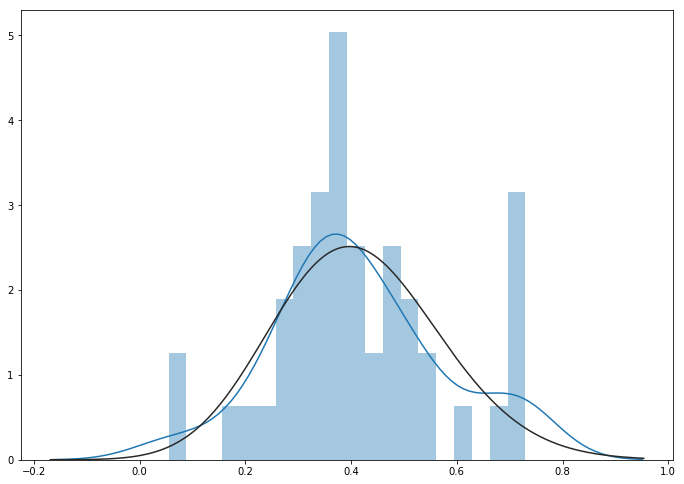

In [15]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(all_data, bins=20, norm_hist=True, fit=beta)
#xs = np.arange(0.0,1,0.0001)
#theta_beta = beta.fit(plot_data)
#ax.plot(xs, beta.pdf(xs, *theta_beta)) #3.28, 1.714, loc=0.9652, scale=0.0276))

In [16]:
theta_beta = beta.fit(all_data)
theta_norm = norm.fit(all_data)
theta_gamma = gamma.fit(all_data)

In [17]:
theta_beta, theta_norm, theta_gamma

((43.03425582327249,
  220.89252415821664,
  -0.7292258901836237,
  7.015745772613451),
 (0.41459166523119895, 0.15936759532671343),
 (71.91729998665195, -0.9362512966928411, 0.018783281951247618))

In [18]:
ana_utils.log_likelihood(all_data, lambda x: beta.pdf(x,*theta_beta))

AttributeError: module 'src.analysis.utils' has no attribute 'log_likelihood'

In [ ]:
ana_utils.log_likelihood(all_data, lambda x: norm.pdf(x,*theta_norm))

In [ ]:
ana_utils.log_likelihood(all_data, lambda x: gamma.pdf(x,*theta_gamma))

In [ ]:
kstest(all_data, lambda x: beta.cdf(x, *theta_beta))

In [ ]:
x = 1
f"""{x}"""

In [ ]:
distr = beta

for i in range(1,11):
    xs = ana_utils.get_tms_entropy(
        '/media/sf_VBoxshare/Experimente/output/static_2/gsat.db', i,
        eps=2**(-10), max_loops=20000
    )
                                  
    all_data = []
    for _, h, conv in xs:
        if conv and h > 0.01:
            all_data.append(h)
        
    theta = distr.fit(all_data)
    res = kstest(all_data, lambda x: distr.cdf(x,*theta))
    print(res.statistic)
    print('Convergent: ', len(all_data))
    if res.statistic >= 0.1358:
        print('Fail')
    else:
        print('Passed')
    

In [ ]:
with sqlite3.connect('experiments.db') as conn:
    cur = conn.cursor()
    cursor.execute(
        "SELECT "
    )